In [4]:
import Graphing
import numpy as np
import sympy as sp

In [5]:
N = 5 # cantidad de masas a simular

L = 10       # largo L
T_0 = 4      # tension promedio de la cuerda en reposo
rho = 0.1    # densidad lineal de la cuerda

h = L/(N+1)
c = np.sqrt(T_0/rho)

sp.init_printing()

## Inciso a) - extremos fijos

Tengo por la ecuación clásica de ondas

$$\frac{\partial^{2}\Psi}{\partial t^{2}}=\frac{T_0}{\rho}\frac{\partial^{2}\Psi}{\partial x^{2}}$$

y tomando la aproximación $\frac{\partial^{2}\Psi}{\partial x^{2}}\approx\frac{1}{h^{2}}(\psi_{n+1}(t)-2\psi_{n}(t)+\psi_{n-1}(t))$

$$\frac{\partial\psi}{\partial t}\approx-\frac{T_0}{\rho h^{2}}(2\psi_n-\psi_{n-1}-\psi_{n+1})$$

Que puedo reescribir matricialmente como

$$\ddot{\vec{\psi}}_n+\frac{T_0}{\rho}M\vec{\psi}=0\qquad con \quad M=\begin{bmatrix}2&-1&0&0&...&0\\-1&2&-1&0&...&0\\0&-1&2&-1&...&0\\.&.&&&&.\\.&&.&&&.\\.&&&.&&.\\.&&&&.&.\\0&...&0&-1&2&-1\\0&...&0&0&-1&2\end{bmatrix}$$

Luego, solo resta resolver la ecuacion $det(M-\omega^{2}I)=0$ para obtener los autovalores (que son las frecuencias de los modos normales) y los autovectores (que son las amplitudes de cada masa para cada modo normal)

Puedo modificar la matriz $M$ y los vectores $\ddot{\vec{\psi}}$ y $\vec{\psi}$ de forma tal de añadir masas virtuales $\psi_{0}$ y $\psi_{N+1}$ que hagan las de borde. Para el caso de extemos fijos, ambas masas s mantendrán inmóviles para todo tiempo mientras (como si tuvieran masa infinita) y para el caso de extremos fijo-libre, $\psi_0$ se mantendra quita mientras que $\psi_{N+1}$ describirá una trayectoria igual a la de $\psi_N$ (como si tuviera masa nula). De esta manera podemos redefinir M como:

$$M=\begin{bmatrix}0&0&0&0&0&...&0&0\\-1&2&-1&0&0&...&0&0\\0&-1&2&-1&0&...&0&0\\0&0&-1&2&-1&...&0&0\\.&.&&&&&&.\\.&&.&&&&&.\\.&&&.&&&&.\\.&&&&.&&&.\\.&&&&&.&&.\\.&&&&&&.&.\\0&0&...&0&-1&2&-1&0\\0&0&...&0&0&-1&2&-1\\0&0&...&0&0&0&0&0\end{bmatrix}$$

In [6]:
### crear matriz M ###
def construccion_matriz_ff(i, j):
    if (i == 1 and j == 0) or (i == N-1 and j == N):
        return -c
    elif i == 0 or j == 0 or i == N or j == N:
        return 0
    elif i == j:
        return 2*c
    elif i+1 == j:
        return -c
    elif i-1 == j:
        return -c
    else:
        return 0

M_ff = sympy.Matrix(N,N,construccion_matriz_ff)
print('La matriz "M" para el caso fijo-fijo es:\n')
sp.pprint(M_ff)

### encontrar auto-cosas ###

eigenvals_ff = [] # los autovalores son las frecuencias cuadradas
eigenvects_ff = []
for eigenvect in M_ff.eigenvects():
    eigenvects_ff.append(eigenvect[0])
    eigenvects_ff.append(eigenvect[2][0])

# si esto es falso es que hay multiplicidades distintas de uno y hay quilombo
assert (N == len(eigenvals_ff) and len(eigenvals_ff) == len(eigenvects_ff))

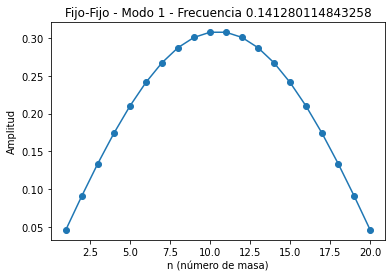

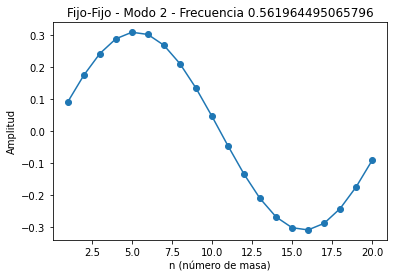

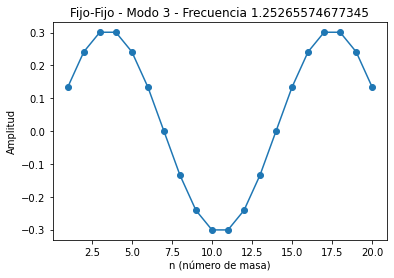

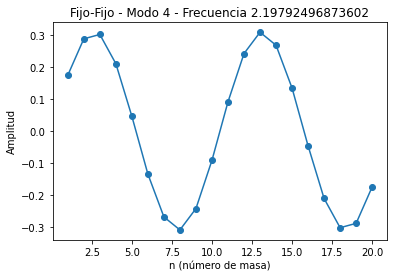

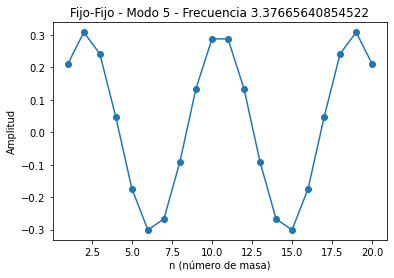

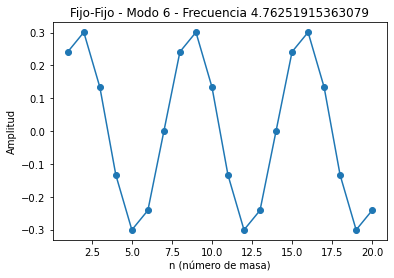

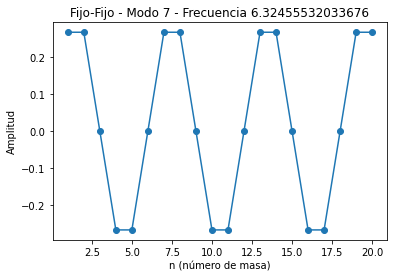

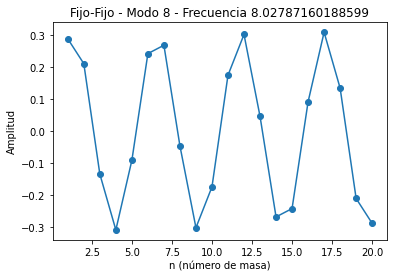

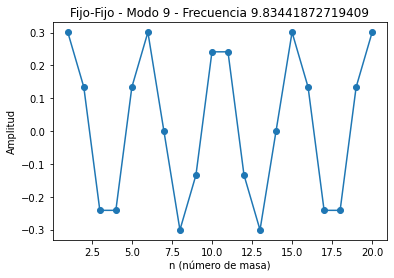

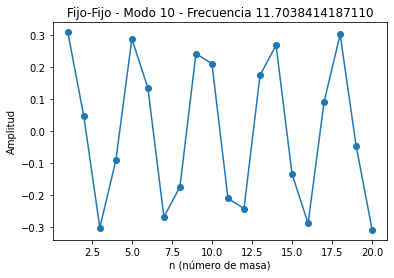

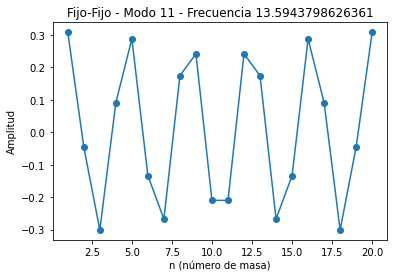

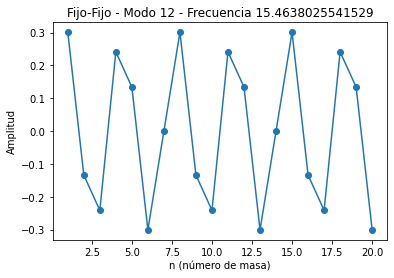

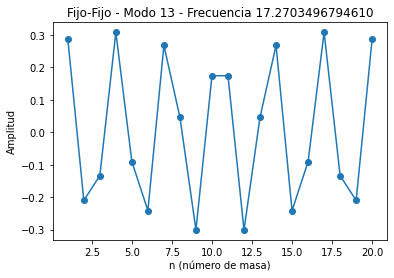

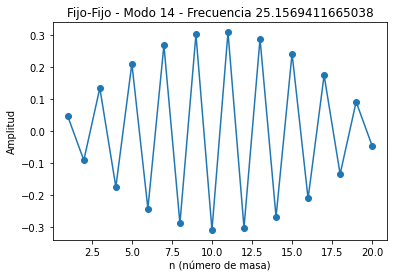

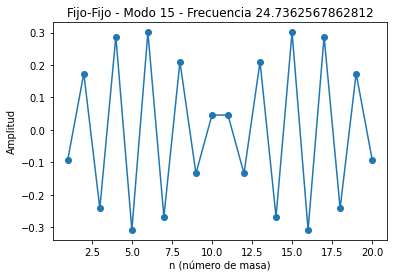

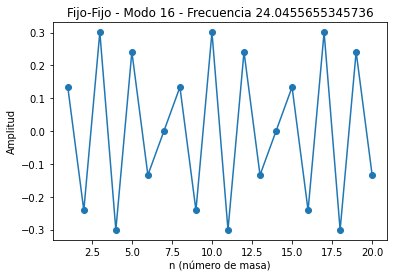

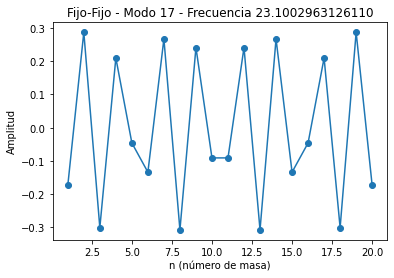

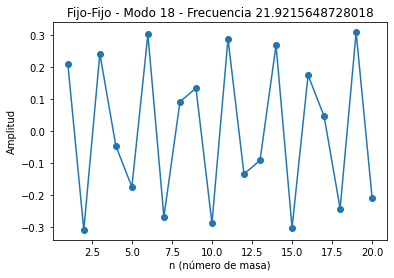

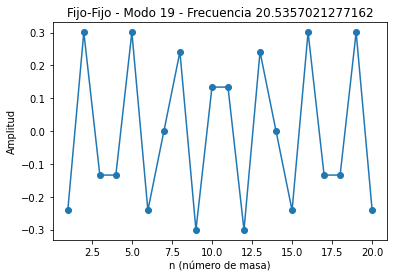

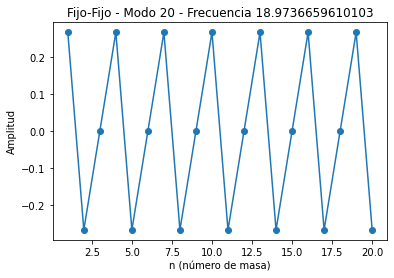

In [7]:
### Graficar ###
# Modos

X = np.arrange(range(N+1))
Ys = np.arrange(eigenvects)

for p in range(min(len(eigenvals_ff), modoMaximoRepresentado)): # cada frecuencia de cada modo normal
   
    
# NO SE QUE QUIERE CUANDO PIDE QUE RELACIONEMOS LOS AUTOVALORES CON LA 
# FRECUENCIA NATURAL (QUE ES LA FRECUENCIA NATURAL? LA FRECUENCIA DEL MODO 1?)

# TAMPOCO SE QUE QUIERE CUANDO PIDE RELACIONAR LOS AUTOVALS CON LAS LONGITUDES DE ONDA

## Inciso a) - extremos fijo-libre

Escribo la ecuacion (2) como

$$\frac{\partial\psi}{\partial t}\approx-\frac{T_0}{\rho}(2\psi_n-\psi_{n-1}-\psi_{n+1})$$

Que puedo reescribir matricialmente como

$$\ddot{\vec{\psi}}_n+\frac{T_0}{\rho}M\vec{\psi}=0\qquad con \quad M=\begin{bmatrix}2&-1&0&0&...&0\\-1&2&-1&0&...&0\\0&-1&2&-1&...&0\\.&.&&&&.\\.&&.&&&.\\.&&&.&&.\\.&&&&.&.\\0&...&0&-1&2&-1\\0&...&0&0&-1&1\end{bmatrix}$$

Luego, solo resta resolver la ecuacion $det(M-\omega^{2}I)=0$ para obtener los autovalores (que son las frecuencias de los modos normales) y los autovectores (que son las amplitudes de cada masa para cada modo normal)

En esta ecuacion matricial se incluyeron las condiciones de contorno sobre la masa 1 y la masa N (Se ve como sobre la masa 1 actúa la fuerza elastica de un resorte que está fijo en un extremo y sobre la masa N actúa únicamente una la fuerza de un resorte cuyos extremos están sujetos a la masa N y a la masa N-1) por lo que no hace falta plantear la masa virtual $\psi_0$ ya que $\psi_1(t)=0\forall t$. Sin embargo sí se puede pensar en una masa $\psi_{N+1}$ tal que $\psi(t)_N=\psi(t)_{N+1}\forall t$.

In [2]:
### crear matriz M ###
def assignment(i, j):
    if (i == 1 and j == 0) or (i == N-1 and j == N):
        return -c
    elif i == 0 or j == 0 or i == N or j == N:
        return 0
    elif i == j:
        return 2*c
    elif i+1 == j:
        return -c
    elif i-1 == j:
        return -c
    else:
        return 0

M_fl = sympy.Matrix(N,N,assignment)
#sympy.pprint(M_fl)

### encontrar auto-cosas ###

eigenvals_fl = [] # los autovalores son las frecuencias cuadradas
eigenvects_fl = []
for eigenval in M_fl.eigenvals():
    eigenvals_fl.append(eigenval)
for eigenvect in M_fl.eigenvects():
    eigenvects_fl.append(eigenvect[2][0])

# si esto es falso es que hay multiplicidades distintas de uno y hay quilombo
assert (N == len(eigenvals_fl) and len(eigenvals_fl) == len(eigenvects_fl))

NameError: name 'N' is not defined

In [3]:
### Graficar ###
# Modos
for p in range(min(len(eigenvals_ff), modoMaximoRepresentado)): # cada frecuencia de cada modo normal
    plt.scatter(range(1,N+1), eigenvects_ff[p])
    plt.plot(range(1,N+1), eigenvects_ff[p])
    plt.title('Fijo-Libre - Modo {0} - Frecuencia {1}'.format(p + 1, eigenvals_ff[p]))
    plt.ylabel('Amplitud')
    plt.xlabel('n (número de masa)')
    plt.show()
    
# NO SE QUE QUIERE CUANDO PIDE QUE RELACIONEMOS LOS AUTOVALORES CON LA 
# FRECUENCIA NATURAL (QUE ES LA FRECUENCIA NATURAL? LA FRECUENCIA DEL MODO 1?)

# TAMPOCO SE QUE QUIERE CUANDO PIDE RELACIONAR LOS AUTOVALS CON LAS LONGITUDES DE ONDA

NameError: name 'eigenvals_ff' is not defined